In [1]:
import tests.generate_tests as test
from copy import deepcopy
import math
from Point import Point
from Rectangle import Rectangle
from visualizer_bit.main import Visualizer
import matplotlib.pyplot as plt
import numpy as np
vis = Visualizer()

In [2]:
import numpy as np
def random_points(n,x,y):
    res=[]
    for _ in range(n):
        res.append((np.random.uniform(0,x),np.random.uniform(0,y)))
    return res

[(0, np.float64(89.45425393283574)), (np.float64(22.321410747642688), 0), (100, np.float64(3.194342675997092)), (np.float64(72.21473922974306), 100), (np.float64(99.81776776988079), 0), (np.float64(97.39372992643389), 100), (np.float64(41.503531297850984), 100), (np.float64(10.310478336385813), 0), (np.float64(90.83058076018942), 100), (100, np.float64(27.50680569988208)), (np.float64(78.71546960785349), 0), (0, np.float64(20.416078425643718)), (100, np.float64(86.37380855725371)), (0, np.float64(31.61185576645238)), (np.float64(4.262137651805764), 100), (np.float64(66.25935956660354), 100), (np.float64(14.163573146519903), 100), (np.float64(19.461147368140928), 0), (100, np.float64(78.76632715604673)), (np.float64(36.55966268434834), 100), (100, np.float64(58.0950252012974)), (np.float64(76.80903333740682), 0), (100, np.float64(38.05974041664021)), (0, np.float64(21.061008030486335)), (np.float64(88.8382852930822), 100), (0, np.float64(36.82049429076784)), (100, np.float64(70.73541936

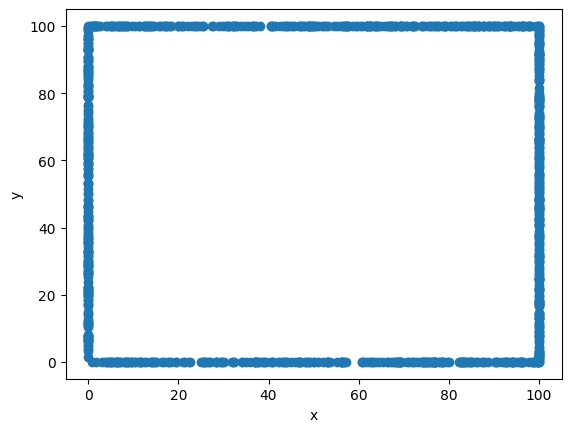

In [3]:
cos = test.generate_random_points_on_rectangle(1000,0,100,0,100)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

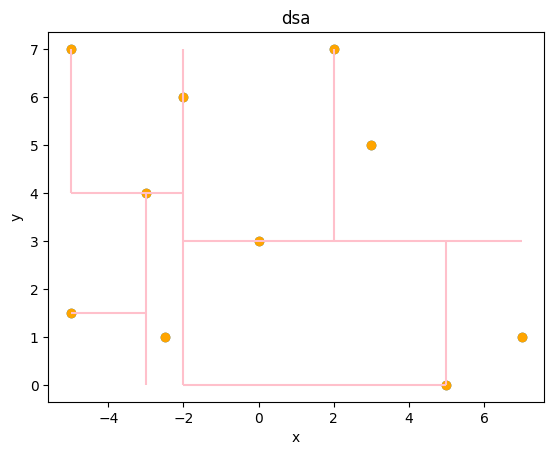

In [1]:
import kd_tree_vis
test = [(-5,1.5),(-3,4),(-2.5,1),(-5,7),(-2,6),(5,0),(0,3),(7,1),(2,7),(3,5)]
tmp = kd_tree_vis.visualization()
visual = tmp.give_visualization_of_create(test)
visual.add_title("dsa")
visual.show()

(ro jest prostokąt((-4, 0))),((5, 4))
(ro jest prostokąt([-4, 0])),([5, 4])
[(-3, 4), (-2.5, 1), (5, 0), (0, 3)]


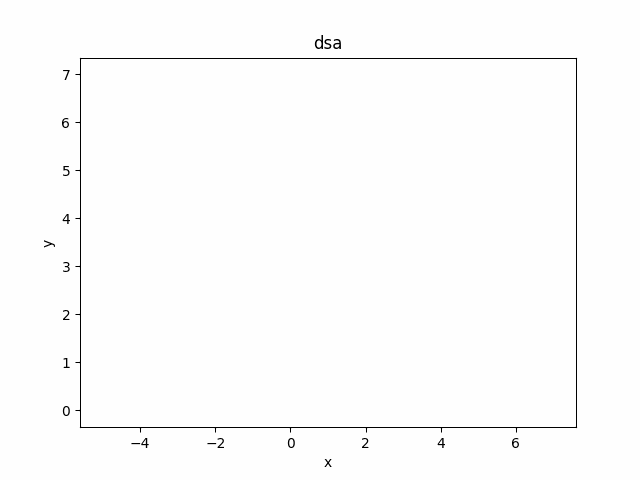

In [2]:
visual = tmp.give_visualization_of_search((-1,1),(4,6))
visual.add_title("dsa")
visual.show_gif(interval=400)

[(-37.1275492138592, 0), (-22.601239330384505, 0), (0, -38.799545203827314), (0, 27.317382618406242), (0, -38.17614445666374), (0, -34.13486253287124), (0, 49.83300006910777), (0, 8.329069996548291), (-20.80740685227218, 0), (-45.98927878247036, 0), (33.888591736322084, 0), (0, 42.87224349580529), (4.018287355878655, 0), (0, -38.173828603239286), (26.82576501981565, 0), (0, -22.342548714126565), (0.7134744363235583, 0), (0, 47.97157063728466), (0, 17.92209026939861), (24.357045515068194, 0), (0, 46.13047022910163), (-11.479075370808708, 0), (-37.879251921128144, 0), (-28.447030926336446, 0), (34.3039146526765, 0), (0, 24.74196735210458), (-43.07301331439011, 0), (22.28283115095651, 0), (0, -34.12233324411859), (-22.47413767555252, 0), (0, -24.978518864019595), (0, 14.840929587732916), (0, 5.823990817130124), (0, 17.457514564521006), (-49.569497474213506, 0), (-49.38210647418335, 0), (-25.5581043977247, 0), (34.14195528755258, 0), (0, -40.589838612279415), (0, 17.20652554606758), (0, -8

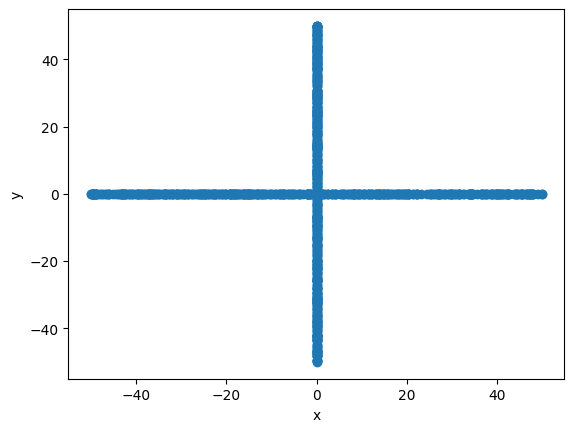

In [2]:
cos = test.cross_on_axes(1000,-50,50,-50,50)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

[]


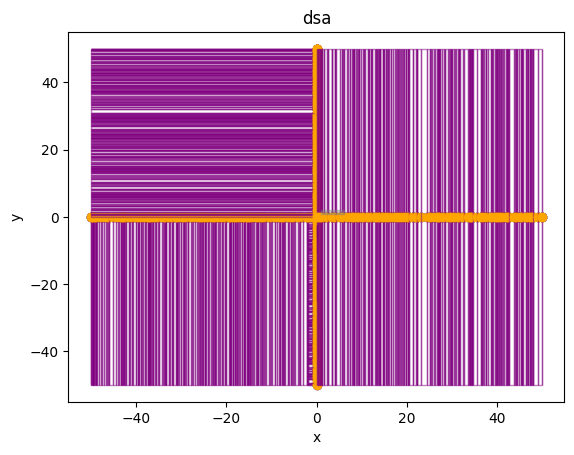

In [3]:
import kd_tree_vis
visual = kd_tree_vis.give_visualization(cos,(1,1),(6,2))
visual.add_title("dsa")
visual.show()

[(np.float64(12.015478879487407), np.float64(9.604525887000767)), (np.float64(10.197169241452976), np.float64(10.43254838936131)), (np.float64(10.072581818516705), np.float64(9.776330953434464)), (np.float64(10.934599973143145), np.float64(11.361020815582236)), (np.float64(8.44104235426828), np.float64(11.692405247938517)), (np.float64(9.322148105887276), np.float64(10.838285869555609)), (np.float64(8.628869957144675), np.float64(8.899582902952615)), (np.float64(12.474102967481185), np.float64(10.43306668220757)), (np.float64(9.611458065230197), np.float64(9.715373092886232)), (np.float64(8.905785052300619), np.float64(10.770251281390035)), (np.float64(11.402935813436445), np.float64(9.046073926629337)), (np.float64(10.305770325567842), np.float64(8.086290199672383)), (np.float64(11.669964265745707), np.float64(7.9205928097308735)), (np.float64(11.983262171744492), np.float64(9.189873036714944)), (np.float64(8.902190886415887), np.float64(9.071354461254098)), (np.float64(10.12465221102

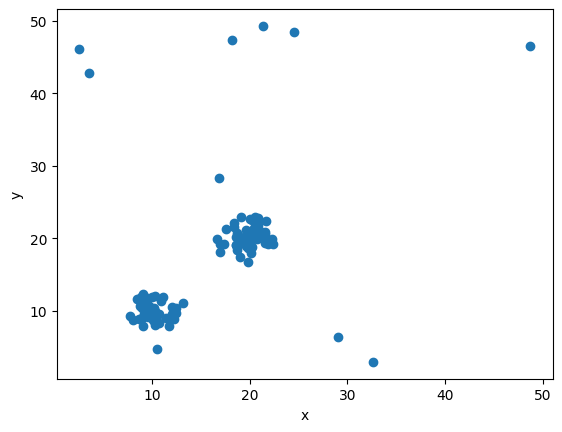

In [4]:
cos = test.add_outliners(10,test.generate_clasters(100,2,0,10,0,10),0,10,0,10)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

[((np.float64(8.721281783438279), np.float64(10.706020283129684))), ((np.float64(8.905785052300619), np.float64(10.770251281390035))), ((np.float64(9.051266599368597), np.float64(10.796532374794262))), ((np.float64(9.322148105887276), np.float64(10.838285869555609))), ((np.float64(9.457372235087414), np.float64(11.504814452167944))), ((np.float64(9.694587604121946), np.float64(10.727633978272143))), ((np.float64(10.197169241452976), np.float64(10.43254838936131)))]
[((np.float64(8.44104235426828), np.float64(11.692405247938517))), ((np.float64(8.805372467025807), np.float64(11.900947167212266)))]
[((np.float64(9.489492337849896), np.float64(11.762198458495966))), ((np.float64(9.97214296905356), np.float64(11.950116984618587)))]
[((np.float64(10.255009700708513), np.float64(12.089426297240179))), ((np.float64(10.934599973143145), np.float64(11.361020815582236))), ((np.float64(11.062129386891602), np.float64(11.970014865476514))), ((np.float64(12.062615068476772), np.float64(10.514588595

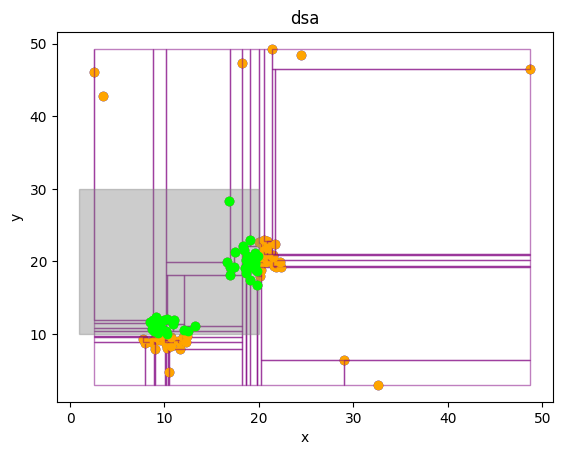

In [5]:
import kd_tree_vis
visual = kd_tree_vis.give_visualization(cos,(1,10),(20,30))
visual.add_title("dsa")
visual.show()

[(np.float64(4.0601952843013756), np.float64(11.661777445466274)), (np.float64(-1.3005764338264396), np.float64(1.941616766261082)), (np.float64(10.190449701021645), np.float64(30.205573168061765)), (np.float64(-13.454084638391318), np.float64(7.023086419527069)), (np.float64(11.285005246208872), np.float64(2.207440440133367)), (np.float64(3.7881345630922865), np.float64(0.4016123908049486)), (np.float64(-17.41218051708063), np.float64(16.413559244968262)), (np.float64(-11.9962369284158), np.float64(1.7000939249594307)), (np.float64(-29.75037978553089), np.float64(-1.3582870955626345)), (np.float64(5.762474215337037), np.float64(-5.282437097779237))]


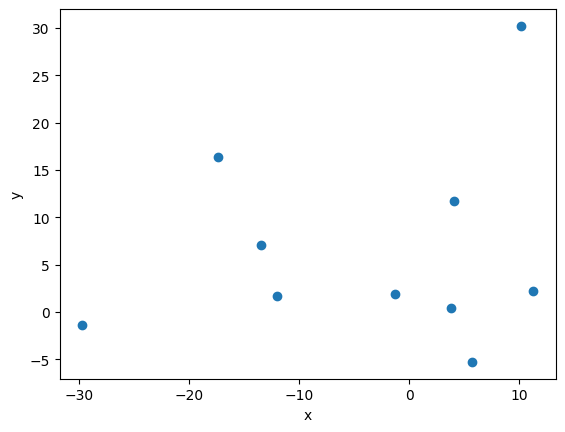

In [6]:
cos = test.generate_standard_distribution(10,1,1,10,10)
print(cos)
vis.clear()
vis.add_point(cos)

vis.show()

[(np.float64(11.285005246208872), np.float64(2.207440440133367))]


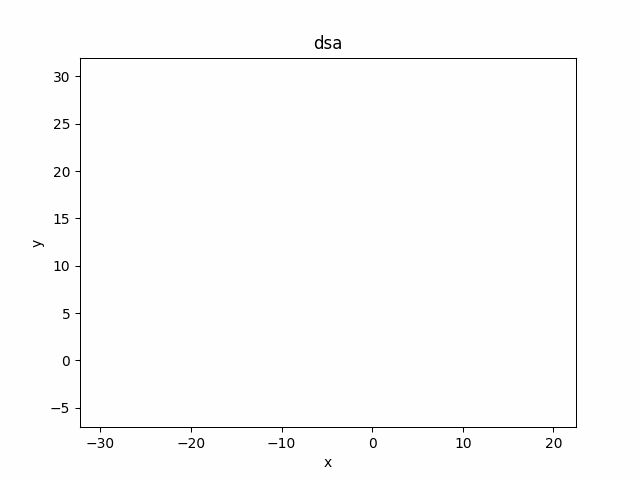

In [7]:
import kd_tree_vis
visual = kd_tree_vis.give_visualization(cos,(1,1),(20,10))
visual.add_title("dsa")
visual.show_gif()

In [8]:
from kd_tree import KdTree
testa = test.generate_multidimensional_cluster(5,2,10,4)
print(testa)
a = KdTree(testa,4)
print(a.root.print_tree())

print(a.search_in_recangle(((-3,0,0,0),(10,10,10,10))))
for poin in testa:
    print(a.check_contains(poin))
#chyba działa

[[4.85853236 5.92321084 6.47643063 4.14800778]
 [2.57777115 5.3933349  7.93449411 6.83015355]
 [7.11093331 7.47212408 2.70350222 4.06384901]
 [4.67620256 5.70554261 4.18868996 5.20492768]
 [8.12760847 4.52899075 6.66141873 5.68630185]
 [5.17868496 4.19171482 5.32080411 4.84520871]
 [1.98918225 3.37398917 6.04804368 6.08773899]
 [9.06563158 7.66220091 7.08132489 1.32457922]
 [6.82976629 8.88359042 7.69179877 6.38066745]
 [4.88010537 4.170376   6.56848428 8.62156522]]
[] 0 (ro jest prostokąt([np.float64(1.989182251583927), np.float64(3.3739891744350223), np.float64(2.7035022242414204), np.float64(1.3245792237863085)])),([np.float64(9.065631580046649), np.float64(8.883590419601617), np.float64(7.934494111613444), np.float64(8.621565220268563)])
[([1.98918225 3.37398917 6.04804368 6.08773899]), ([4.88010537 4.170376   6.56848428 8.62156522]), ([2.57777115 5.3933349  7.93449411 6.83015355]), ([4.67620256 5.70554261 4.18868996 5.20492768]), ([4.85853236 5.92321084 6.47643063 4.14800778])] 1 